In [1]:
# Importando bibliotecas
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import scipy


In [2]:
# Caminho dos dados
base_dir = '.\datasets\sand'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [4]:
# Criando geradores de dados com aumento de dados
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Configurando os lotes de treino, validação e teste
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    classes=['red', 'black']
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    classes=['red', 'black']
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    classes=['red', 'black']
)

Found 395 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [6]:
# Construindo o modelo da rede neural com dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adicionando dropout para evitar overfitting
model.add(Dense(1, activation='sigmoid'))

In [7]:
# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Treinando o modelo
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10


13/13 [==============================] - 57s 4s/step - loss: 0.5797 - accuracy: 0.6709 - val_loss: 0.3332 - val_accuracy: 0.9000
Epoch 2/10
13/13 [==============================] - 68s 5s/step - loss: 0.2071 - accuracy: 0.9468 - val_loss: 0.3052 - val_accuracy: 0.9667
Epoch 3/10
13/13 [==============================] - 74s 6s/step - loss: 0.1754 - accuracy: 0.9519 - val_loss: 0.0524 - val_accuracy: 1.0000
Epoch 4/10
13/13 [==============================] - 79s 6s/step - loss: 0.1457 - accuracy: 0.9646 - val_loss: 0.0816 - val_accuracy: 0.9667
Epoch 5/10
13/13 [==============================] - 77s 6s/step - loss: 0.0931 - accuracy: 0.9646 - val_loss: 0.0651 - val_accuracy: 0.9667
Epoch 6/10
13/13 [==============================] - 76s 6s/step - loss: 0.0828 - accuracy: 0.9747 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 75s 6s/step - loss: 0.0717 - accuracy: 0.9671 - val_loss: 0.0218 - val_accuracy: 1.0000
Epoch 8/10
13/13 [

In [9]:
# Avaliando o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


1/1 [==============================] - 2s 2s/step - loss: 0.0445 - accuracy: 1.0000
Test Loss: 0.04450289160013199, Test Accuracy: 1.0


In [11]:
# Salvando o modelo
model.save('TG/soil_classifier_model.h5')

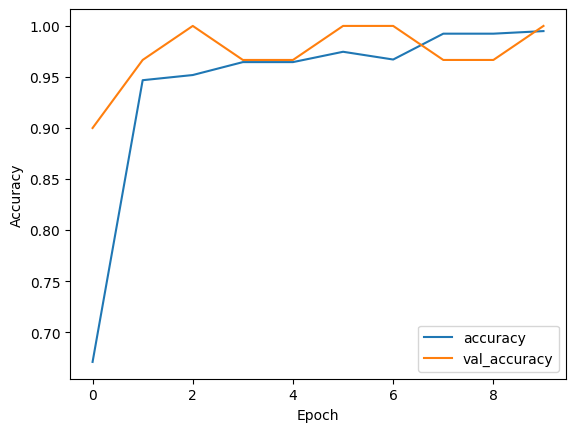

In [12]:
# Visualizando as curvas de treino e validação
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()